# Multidimensional differential equations

- Börge Göbel 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

# 3-body problem

In [2]:
# Constants in SI units

# Gravitational constant
G = 6.67430*10**(-11) # m^3 / ( kg * s^2 )

# Masses
msun = 1.9884 * 10**30 # kg
mearth = 5.9723 * 10**24 # kg
mmoon = 7.349 * 10**22 # kg

# Distances (average)
rSunEarth = 1.4960 * 10**11 # m
rEarthMoon = 3.850 * 10**8 # m

# Velocities (average)
vEarth = 29780 # m/s (Trajectory around sun)
vMoon = 1022 # m/s (Trajectory around earth)

## A) Sun, Earth & Moon

Variables for each of the 3 bodies: \\(x, y, z, v_x, v_y, v_z\\)

Force: Newton's law of gravitation 

\\( \vec{F} =G\frac{mm_0}{|\vec{r}_0-\vec{r}|^3}(\vec{r}_0-\vec{r}) = -G\frac{m_1m_2}{r^2}\vec{e}_r\\) for \\( \vec{r}_0=0\\)

For the three bodies

\\( m_1\ddot{\vec{r}_1}=
G\frac{m_1m_2}{|\vec{r}_2-\vec{r}_1|^3}(\vec{r}_2-\vec{r}_1) + G\frac{m_1m_3}{|\vec{r}_3-\vec{r}_1|^3}(\vec{r}_3-\vec{r}_1)\\
m_2\ddot{\vec{r}_2}=
G\frac{m_2m_1}{|\vec{r}_1-\vec{r}_2|^3}(\vec{r}_1-\vec{r}_2) + G\frac{m_2m_3}{|\vec{r}_3-\vec{r}_2|^3}(\vec{r}_3-\vec{r}_2)\\
m_3\ddot{\vec{r}_3}=
G\frac{m_3m_1}{|\vec{r}_1-\vec{r}_3|^3}(\vec{r}_1-\vec{r}_3) + G\frac{m_3m_2}{|\vec{r}_2-\vec{r}_3|^3}(\vec{r}_2-\vec{r}_3)
\\)

We have the solve the following differential equations

\\( \ddot{\vec{r}_1}=
-G\left(\frac{m_2}{|\vec{r}_2-\vec{r}_1|^3}+\frac{m_3}{|\vec{r}_3-\vec{r}_1|^3}\right)\vec{r}_1 + G\frac{m_2}{|\vec{r}_2-\vec{r}_1|^3}\vec{r}_2 + G\frac{m_3}{|\vec{r}_3-\vec{r}_1|^3}\vec{r}_3\\
\ddot{\vec{r}_2}=
G\frac{m_1}{|\vec{r}_1-\vec{r}_2|^3}\vec{r}_1 -G\left(\frac{m_1}{|\vec{r}_1-\vec{r}_2|^3}+\frac{m_3}{|\vec{r}_3-\vec{r}_2|^3}\right)\vec{r}_2 + G\frac{m_3}{|\vec{r}_3-\vec{r}_2|^3}\vec{r}_3\\
\ddot{\vec{r}_3}=
G\frac{m_1}{|\vec{r}_1-\vec{r}_3|^3}\vec{r}_1 + G\frac{m_2}{|\vec{r}_2-\vec{r}_3|^3}\vec{r}_2 -G\left(\frac{m_1}{|\vec{r}_1-\vec{r}_3|^3}+\frac{m_2}{|\vec{r}_2-\vec{r}_3|^3}\right)\vec{r}_3
\\)

In [3]:
m1 = msun
m2 = mearth
m3 = mmoon

def f_ODE(t,r):
    r1 = r[0:3]
    r2 = r[3:6]
    r3 = r[6:9]
    #v1 = r[9:12]
    r12 = np.linalg.norm(r1-r2)
    r23 = np.linalg.norm(r2-r3)
    r31 = np.linalg.norm(r3-r1)
    eqr = G * np.array([
        - ( m2/r12**3 + m3/r31**3 ) * r1 + m2/r12**3 * r2 + m3/r31**3 *r3,
        m1/r12**3 * r1 - ( m1/r12**3 + m3/r23**3 ) * r2 + m3/r23**3 * r3,
        m1/r31**3 * r1 + m2/r23**3 * r2 - ( m1/r31**3 + m2/r23**3 ) * r3
    ])
    return np.concatenate([ r[9:18], eqr.flatten() ])

In [4]:
# sun
r1start = np.array([0,0,0])
v1start = np.array([0,0,0])

# earth
r2start = np.array([rSunEarth, 0, 0])
v2start = np.array([0, vEarth, 0])

# moon
r3start = np.array([rSunEarth, rEarthMoon, 0])
v3start = np.array([-vMoon, vEarth, 0])

r0 = np.concatenate( [r1start, r2start, r3start, v1start, v2start, v3start] )

In [5]:
f_ODE(0,r0)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.97800000e+04,  0.00000000e+00, -1.02200000e+03,  2.97800000e+04,
        0.00000000e+00,  1.80299923e-08,  5.64021430e-13,  0.00000000e+00,
       -5.92988527e-03,  3.30911997e-05,  0.00000000e+00, -5.92982636e-03,
       -2.70447778e-03,  0.00000000e+00])

In [6]:
tStart = 0

# 1 year = 60 * 60 * 24 *365.25 seconds
tEnd = 60 * 60 * 24 *365.25 * 10.0

solution = integrate.solve_ivp(f_ODE, [tStart, tEnd], r0, method = 'RK45', t_eval = np.linspace(tStart,tEnd,100001), rtol = 0.000001*1e-3, atol = 0.000001*1e-6)

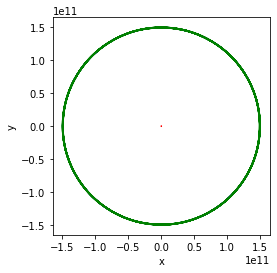

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x')
plt.ylabel('y')

plt.plot( solution.y[0], solution.y[1], 'red')
plt.plot( solution.y[3], solution.y[4], 'blue')
plt.plot( solution.y[6], solution.y[7], 'green')

### Sun

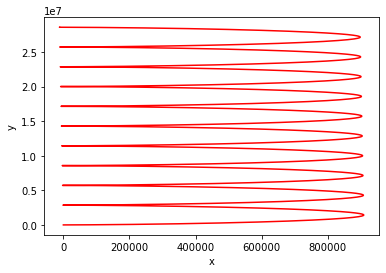

In [8]:
plt.xlabel('x')
plt.ylabel('y')

plt.plot( solution.y[0], solution.y[1], 'red')

### Earth

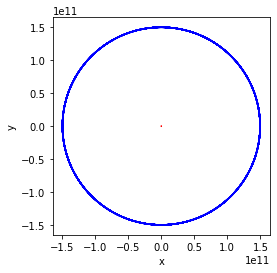

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x')
plt.ylabel('y')

plt.plot( solution.y[0], solution.y[1], 'red')
plt.plot( solution.y[3], solution.y[4], 'blue')

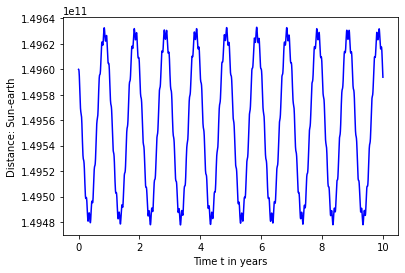

In [10]:
plt.xlabel('Time t in years')
plt.ylabel('Distance: Sun-earth')

plt.plot( solution.t / (60 * 60 * 24 *365.25), np.linalg.norm(solution.y[0:3]-solution.y[3:6], axis=0), 'blue')

### Moon

### Moon orbit around earth

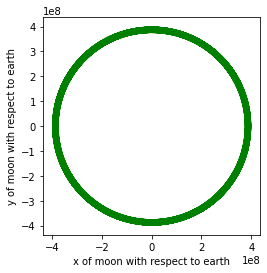

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x of moon with respect to earth')
plt.ylabel('y of moon with respect to earth')

plt.plot( solution.y[6]-solution.y[3], solution.y[7]-solution.y[4], 'green')

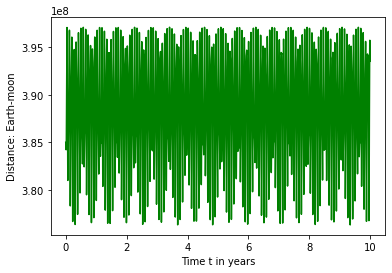

In [12]:
plt.xlabel('Time t in years')
plt.ylabel('Distance: Earth-moon')

plt.plot( solution.t / (60 * 60 * 24 *365.25), np.linalg.norm(solution.y[3:6]-solution.y[6:9], axis=0), 'green')

### Exaggerate moon orbit radius

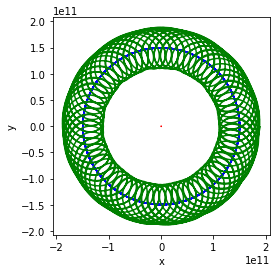

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x')
plt.ylabel('y')

plt.plot( solution.y[0], solution.y[1], 'red')
plt.plot( solution.y[3], solution.y[4], 'blue')
plt.plot( solution.y[3] + 100*(solution.y[6]-solution.y[3]), solution.y[4]+ 100*(solution.y[7]-solution.y[4]), 'green')

## B) Add a fourth body: Spaceship

Since the mass of the spaceship is so small compared to the other masses, we will disregard the effect on sun, earth and moon. 
The 3 differential equation remain. 

The following equation describes the spaceship

\\(
m_4\ddot{\vec{r}_4}=
G\frac{m_4m_1}{|\vec{r}_1-\vec{r}_4|^3}(\vec{r}_1-\vec{r}_4) + 
G\frac{m_4m_2}{|\vec{r}_2-\vec{r}_4|^3}(\vec{r}_2-\vec{r}_4) + 
G\frac{m_4m_3}{|\vec{r}_3-\vec{r}_4|^3}(\vec{r}_3-\vec{r}_4)
\\)

We add to our systems of differential equations:

\\(
\ddot{\vec{r}_4}=
G\frac{m_1}{|\vec{r}_1-\vec{r}_4|^3}\vec{r}_1 + G\frac{m_2}{|\vec{r}_2-\vec{r}_4|^3}\vec{r}_2+ G\frac{m_3}{|\vec{r}_3-\vec{r}_4|^3}\vec{r}_3 -G\left(\frac{m_1}{|\vec{r}_1-\vec{r}_4|^3}+\frac{m_2}{|\vec{r}_2-\vec{r}_4|^3}+\frac{m_3}{|\vec{r}_3-\vec{r}_4|^3}\right)\vec{r}_4
\\)

In [14]:
def f_ODE(t,r):
    r1 = r[0:3]
    r2 = r[3:6]
    r3 = r[6:9]
    r4 = r[9:12]
    r12 = np.linalg.norm(r1-r2)
    r23 = np.linalg.norm(r2-r3)
    r31 = np.linalg.norm(r3-r1)
    r14 = np.linalg.norm(r1-r4)
    r24 = np.linalg.norm(r2-r4)
    r34 = np.linalg.norm(r3-r4)
    eqr = G * np.array([
        - ( m2/r12**3 + m3/r31**3 ) * r1 + m2/r12**3 * r2 + m3/r31**3 *r3,
        m1/r12**3 * r1 - ( m1/r12**3 + m3/r23**3 ) * r2 + m3/r23**3 * r3,
        m1/r31**3 * r1 + m2/r23**3 * r2 - ( m1/r31**3 + m2/r23**3 ) * r3,
        m1/r14**3 * r1 + m2/r24**3 * r2 + m3/r34**3 * r3 - ( m1/r14**3 + m2/r24**3 + m3/r34**3 ) * r4
    ])
    return np.concatenate([ r[12:24], eqr.flatten() ])

In [15]:
rOrbit = 4.2164*10**7 # m (from earth center)
vOrbit = 3075 # m/s

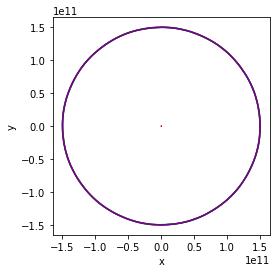

In [16]:
# sun
r1start = np.array([0,0,0])
v1start = np.array([0,0,0])

# earth
r2start = np.array([rSunEarth, 0, 0])
v2start = np.array([0, vEarth, 0])

# moon
r3start = np.array([rSunEarth, rEarthMoon, 0])
v3start = np.array([-vMoon, vEarth, 0])

# spaceship
r4start = np.array([rSunEarth, rOrbit, 0])
v4start = np.array([-vOrbit, vEarth, 0])

r0 = np.concatenate( [r1start, r2start, r3start, r4start, v1start, v2start, v3start, v4start] )

tStart = 0

# 1 year = 60 * 60 * 24 *365.25 seconds
tEnd = 60 * 60 * 24 *365.25 * 1.0

solution = integrate.solve_ivp(f_ODE, [tStart, tEnd], r0, method = 'RK45', t_eval = np.linspace(tStart,tEnd,100001), rtol = 0.000001*1e-3, atol = 0.000001*1e-6)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x')
plt.ylabel('y')

plt.plot( solution.y[0], solution.y[1], 'red')
plt.plot( solution.y[3], solution.y[4], 'blue')
plt.plot( solution.y[6], solution.y[7], 'green')
plt.plot( solution.y[9], solution.y[10], 'purple')

### Analyze trajectory with respect to earth and moon

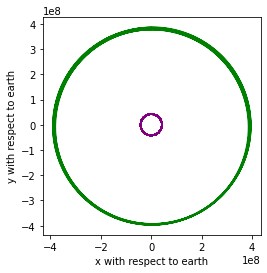

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x with respect to earth')
plt.ylabel('y with respect to earth')

plt.plot( solution.y[6]-solution.y[3], solution.y[7]-solution.y[4], 'green')
plt.plot( solution.y[9]-solution.y[3], solution.y[10]-solution.y[4], 'purple')

### a) Elliptical orbit

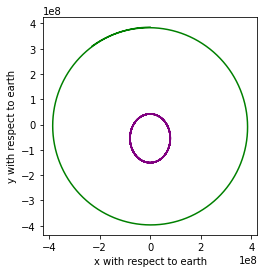

In [20]:
# spaceship
r4start = np.array([rSunEarth, rOrbit, 0])
v4start = np.array([-1.25*vOrbit, vEarth, 0])

r0 = np.concatenate( [r1start, r2start, r3start, r4start, v1start, v2start, v3start, v4start] )

tStart = 0

# 1 year = 60 * 60 * 24 *365.25 seconds
tEnd = 60 * 60 * 24 *365.25 * 1.0 / 12

solution = integrate.solve_ivp(f_ODE, [tStart, tEnd], r0, method = 'RK45', t_eval = np.linspace(tStart,tEnd,100001), rtol = 0.000001*1e-3, atol = 0.000001*1e-6)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x with respect to earth')
plt.ylabel('y with respect to earth')

plt.plot( solution.y[6]-solution.y[3], solution.y[7]-solution.y[4], 'green')
plt.plot( solution.y[9]-solution.y[3], solution.y[10]-solution.y[4], 'purple')

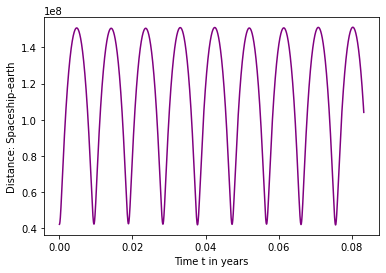

In [21]:
plt.xlabel('Time t in years')
plt.ylabel('Distance: Spaceship-earth')

plt.plot( solution.t / (60 * 60 * 24 *365.25), np.linalg.norm(solution.y[9:12]-solution.y[3:6], axis=0), 'purple')

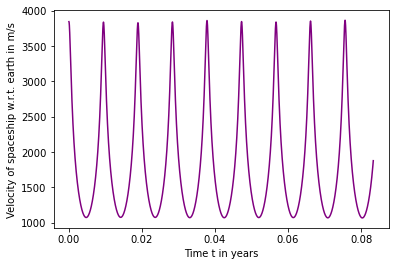

In [22]:
plt.xlabel('Time t in years')
plt.ylabel('Velocity of spaceship w.r.t. earth in m/s')

plt.plot( solution.t / (60 * 60 * 24 *365.25), np.linalg.norm(solution.y[9+12:12+12]-solution.y[3+12:6+12], axis=0), 'purple')

### b) Direct earth escape

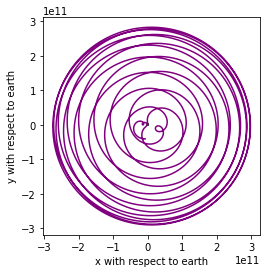

In [28]:
# spaceship
r4start = np.array([rSunEarth, rOrbit, 0])
v4start = np.array([-1.5*vOrbit, vEarth, 0])

r0 = np.concatenate( [r1start, r2start, r3start, r4start, v1start, v2start, v3start, v4start] )

tStart = 0

# 1 year = 60 * 60 * 24 *365.25 seconds
tEnd = 60 * 60 * 24 *365.25 * 16.0

solution = integrate.solve_ivp(f_ODE, [tStart, tEnd], r0, method = 'RK45', t_eval = np.linspace(tStart,tEnd,100001), rtol = 0.000001*1e-3, atol = 0.000001*1e-6)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x with respect to earth')
plt.ylabel('y with respect to earth')

plt.plot( solution.y[6]-solution.y[3], solution.y[7]-solution.y[4], 'green')
plt.plot( solution.y[9]-solution.y[3], solution.y[10]-solution.y[4], 'purple')

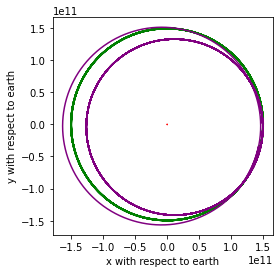

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x with respect to earth')
plt.ylabel('y with respect to earth')

plt.plot( solution.y[0], solution.y[1], 'red')
plt.plot( solution.y[3], solution.y[4], 'blue')
plt.plot( solution.y[6], solution.y[7], 'green')
plt.plot( solution.y[9], solution.y[10], 'purple')

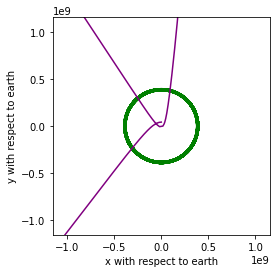

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x with respect to earth')
plt.ylabel('y with respect to earth')

plt.xlim([-3*rEarthMoon,3*rEarthMoon])
plt.ylim([-3*rEarthMoon,3*rEarthMoon])

plt.plot( solution.y[6]-solution.y[3], solution.y[7]-solution.y[4], 'green')
plt.plot( solution.y[9]-solution.y[3], solution.y[10]-solution.y[4], 'purple')

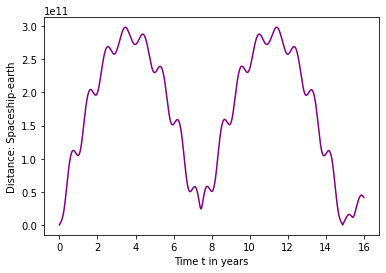

In [31]:
plt.xlabel('Time t in years')
plt.ylabel('Distance: Spaceship-earth')

plt.plot( solution.t / (60 * 60 * 24 *365.25), np.linalg.norm(solution.y[9:12]-solution.y[3:6], axis=0), 'purple')

### c) Earth espace via moon encounter

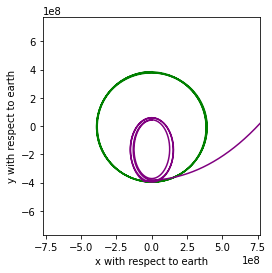

In [34]:
# spaceship
r4start = np.array([rSunEarth, rOrbit, 0])
v4start = np.array([-1.34*vOrbit, vEarth, 0])

r0 = np.concatenate( [r1start, r2start, r3start, r4start, v1start, v2start, v3start, v4start] )

tStart = 0

# 1 year = 60 * 60 * 24 *365.25 seconds
tEnd = 60 * 60 * 24 *365.25 * 0.3

solution = integrate.solve_ivp(f_ODE, [tStart, tEnd], r0, method = 'RK45', t_eval = np.linspace(tStart,tEnd,100001), rtol = 0.000001*1e-3, atol = 0.000001*1e-6)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x with respect to earth')
plt.ylabel('y with respect to earth')

plt.xlim([-2*rEarthMoon,2*rEarthMoon])
plt.ylim([-2*rEarthMoon,2*rEarthMoon])

plt.plot( solution.y[6]-solution.y[3], solution.y[7]-solution.y[4], 'green')
plt.plot( solution.y[9]-solution.y[3], solution.y[10]-solution.y[4], 'purple')

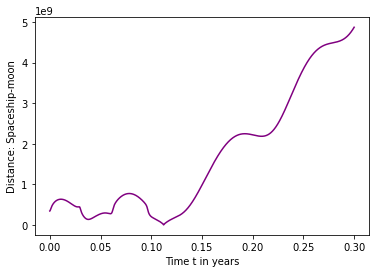

In [35]:
plt.xlabel('Time t in years')
plt.ylabel('Distance: Spaceship-moon')

plt.plot( solution.t / (60 * 60 * 24 *365.25), np.linalg.norm(solution.y[9:12]-solution.y[6:9], axis=0), 'purple')

### d) Moon orbit

We have already achieved a trajectory that aproached the moon. In order to reach a stable orbit, we must decrease the relative velocity of the spaceship once it is close to the moon. We will temporarily apply a force that breaks the spaceship relative to the moon.

The fourth differential equation changes to

\\(
\ddot{\vec{r}_4}=
G\frac{m_1}{|\vec{r}_1-\vec{r}_4|^3}\vec{r}_1 + G\frac{m_2}{|\vec{r}_2-\vec{r}_4|^3}\vec{r}_2+ G\frac{m_3}{|\vec{r}_3-\vec{r}_4|^3}\vec{r}_3 -G\left(\frac{m_1}{|\vec{r}_1-\vec{r}_4|^3}+\frac{m_2}{|\vec{r}_2-\vec{r}_4|^3}+\frac{m_3}{|\vec{r}_3-\vec{r}_4|^3}\right)\vec{r}_4 - \frac{F(t)}{m_4}\vec{e_{v_\mathrm{rel}}}
\\)

with 

\\(
\vec{e_{v_\mathrm{rel}}}=\frac{\dot{\vec{r}}_4-\dot{\vec{r}}_3}{\left|\dot{\vec{r}}_4-\dot{\vec{r}}_3\right|}
\\)

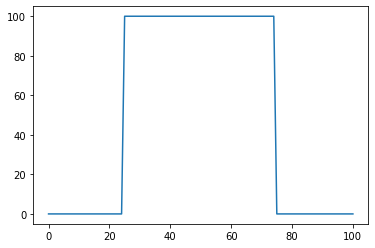

In [38]:
tlist = np.linspace(0,100,101)
plt.plot(tlist, 100*(np.heaviside(tlist-25,1)-np.heaviside(tlist-75,1)) )

In [39]:
def f_ODE(t,r):
    r1 = r[0:3]
    r2 = r[3:6]
    r3 = r[6:9]
    r4 = r[9:12]
    v3 = r[6+12:9+12]
    v4 = r[9+12:12+12]
    br = 27 * 10**6 * (np.heaviside(t - 0.11 * 60 * 60 * 24 *365.25,1)-np.heaviside(t - 0.12 * 60 * 60 * 24 *365.25,1))
    r12 = np.linalg.norm(r1-r2)
    r23 = np.linalg.norm(r2-r3)
    r31 = np.linalg.norm(r3-r1)
    r14 = np.linalg.norm(r1-r4)
    r24 = np.linalg.norm(r2-r4)
    r34 = np.linalg.norm(r3-r4)
    eqr = G * np.array([
        - ( m2/r12**3 + m3/r31**3 ) * r1 + m2/r12**3 * r2 + m3/r31**3 *r3,
        m1/r12**3 * r1 - ( m1/r12**3 + m3/r23**3 ) * r2 + m3/r23**3 * r3,
        m1/r31**3 * r1 + m2/r23**3 * r2 - ( m1/r31**3 + m2/r23**3 ) * r3,
        m1/r14**3 * r1 + m2/r24**3 * r2 + m3/r34**3 * r3 - ( m1/r14**3 + m2/r24**3 + m3/r34**3 ) * r4 - br * (v4-v3) / np.linalg.norm(v4-v3)
    ])
    return np.concatenate([ r[12:24], eqr.flatten() ])

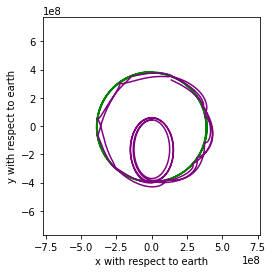

In [42]:
# spaceship
r4start = np.array([rSunEarth, rOrbit, 0])
v4start = np.array([-1.34*vOrbit, vEarth, 0])

r0 = np.concatenate( [r1start, r2start, r3start, r4start, v1start, v2start, v3start, v4start] )

tStart = 0

# 1 year = 60 * 60 * 24 *365.25 seconds
tEnd = 60 * 60 * 24 *365.25 * 0.3

solution = integrate.solve_ivp(f_ODE, [tStart, tEnd], r0, method = 'RK45', t_eval = np.linspace(tStart,tEnd,100001), rtol = 0.000001*1e-3, atol = 0.000001*1e-6)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x with respect to earth')
plt.ylabel('y with respect to earth')

plt.xlim([-2*rEarthMoon,2*rEarthMoon])
plt.ylim([-2*rEarthMoon,2*rEarthMoon])

plt.plot( solution.y[6]-solution.y[3], solution.y[7]-solution.y[4], 'green')
plt.plot( solution.y[9]-solution.y[3], solution.y[10]-solution.y[4], 'purple')

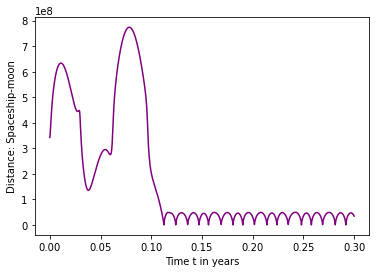

In [43]:
plt.xlabel('Time t in years')
plt.ylabel('Distance: Spaceship-moon')

plt.plot( solution.t / (60 * 60 * 24 *365.25), np.linalg.norm(solution.y[9:12]-solution.y[6:9], axis=0), 'purple')

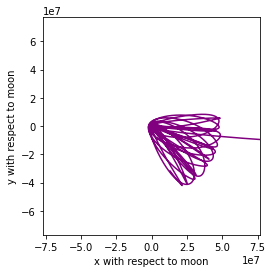

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x with respect to moon')
plt.ylabel('y with respect to moon')

plt.xlim([-0.2*rEarthMoon,0.2*rEarthMoon])
plt.ylim([-0.2*rEarthMoon,0.2*rEarthMoon])

plt.plot( solution.y[9]-solution.y[6], solution.y[10]-solution.y[7], 'purple')